# Dynamic simulation

In [10]:
using LinearAlgebra, DifferentialEquations, Plots, Statistics, MAT

In [175]:
function ResCon!(du,u,para,t)
    N_s,N_r,G,C,gamma,δ = para
    du[1:N_s] = u[1:N_s].*(G*u[N_s+1:N_r+N_s] - δ - 0.005*u[1:N_s]) .+ 1e-7
    du[N_s+1:N_r+N_s] = gamma - u[N_s+1:N_r+N_s].*(C'*u[1:N_s])
end

ResCon! (generic function with 1 method)

In [176]:
N = 100
M = 48

ρ = 0.8

Tgc = randn(N, M , 2)
G = Tgc[:,:,1]
C = ρ * G + √(1-ρ^2) * Tgc[:,:,2]

G = G .+ 1.0
C = C .+ 1.0

Ss = ones(N)
Rs = ones(M)

γ = Rs .* (C' * Ss)
δ = G * Rs - 0.005*Ss;

In [177]:
tspan = (0.0, 1000) # time for one test solution
#para = (Ns,Nr,G,C,g,K,δ)

para = (N,M,G,C,γ,δ)

u0 = zeros(N+M)
u0[1:N] = Ss .* (1 .+ 1.0*(rand(N) .- 0.5))
u0[N+1:end] = Rs .* (1 .+ 1.0*(rand(M) .- 0.5))

prob = ODEProblem(ResCon!,u0,tspan,para)
#VCABM3() or Tsit5() or TRBDF2(), AutoVern7(Rodas4())
sol = solve(prob, saveat = 10, AutoVern7(Rodas4()), isoutofdomain = (u,p,t)->any(x->x < 0.0,u));

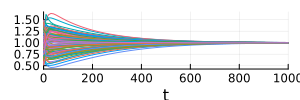

In [178]:
plot(sol,idxs = 1:N,legend = false,
    size = (300,100))

In [179]:
mean(abs.(sol.u[end][1:N] - Ss))

0.001962750512966732

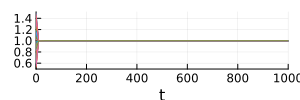

In [180]:
plot(sol,idxs = N+1:N+M,legend = false,
size = (300,100))

In [181]:
mean(abs.(sol.u[end][N+1:N+M] - Rs))

8.467573808790263e-9

In [182]:
# save
myfilename = "../data/dyntest-3.mat"
file = matopen(myfilename, "w")
write(file, "results", sol.u)
close(file)

0 is for GS_f

1 is for AS and GS_p

2 is for Fluc

3 is for GS_f